In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

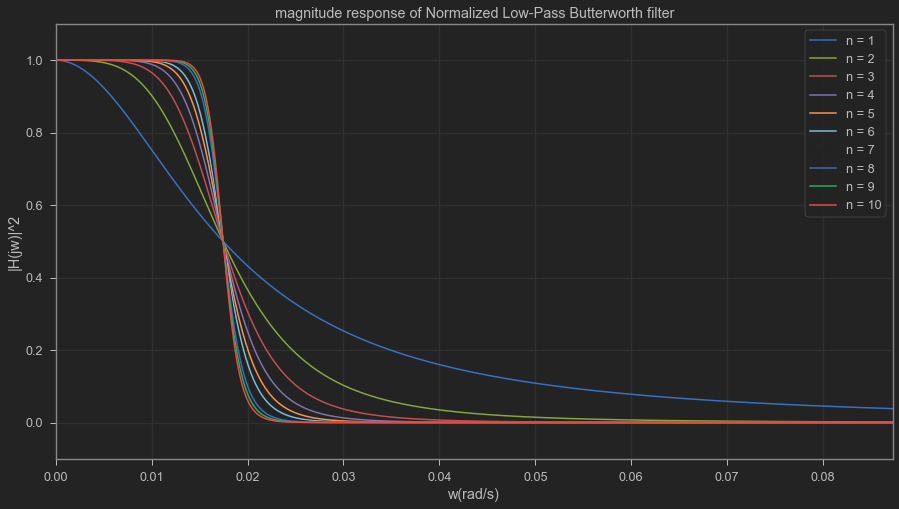

In [3]:
# Magnitude Response of Normalized Low-Pass Butterworth Filter
def ABS_Hjw_pow2 (w, n):
    return 1/(1 + np.power(w, 2*n))

x = np.linspace(0, 5, 1000)
plt.figure(0, figsize=(15, 8))

for i in np.arange(1, 11):
    plt.plot(x*(np.pi/180), ABS_Hjw_pow2(x, i), label='n = {}'.format(i))

plt.grid('on')
plt.xlabel('w(rad/s)')
plt.ylabel('|H(jw)|^2')
plt.title('magnitude response of Normalized Low-Pass Butterworth filter')
plt.margins(0, 0.1)
plt.legend()
plt.show(plt.figure(0))

In [ ]:
# Frequency and Phase Response of Low-Pass Butterworth Filter
b, a = sig.butter(8, 100, 'low', analog=True)

w, h = sig.freqs(b, a)
print(b)
print(a)
plt.figure(11, figsize=(10,4))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100 ,color='green') # cutoff frequency
plt.show(plt.figure(1))


plt.figure(2, figsize=(10,4))
plt.semilogx(w, np.arctan2(np.imag(h), np.real(h)))
plt.title('Butterworth filter Phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show(plt.figure(2))